Use the following code to generate a toy regression dataset, and split the data into 70% training and 30% testing data.

In [19]:
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Set seed for reproducible results
np.random.seed(414)

In [6]:
# Gen toy data
X = np.linspace(0, 15, 1000)
y = 3 * np.sin(X) + np.random.normal(1 + X, .2, 1000)

train_X, train_y = X[:700], y[:700]
test_X, test_y = X[700:], y[700:]

train_df = pd.DataFrame({'X': train_X, 'y': train_y})
test_df = pd.DataFrame({'X': test_X, 'y': test_y})

Using mean squared error as a metric, compare the performance of different polynomial curves in the training set and in the testing set. 

In [7]:
# Linear Fit
poly_1 = smf.ols(formula='y ~ 1 + X', data=train_df).fit()

In [9]:
print(poly_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     1254.
Date:                Sun, 20 Nov 2016   Prob (F-statistic):          5.52e-158
Time:                        15:59:35   Log-Likelihood:                -1483.4
No. Observations:                 700   AIC:                             2971.
Df Residuals:                     698   BIC:                             2980.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.9959      0.152     13.104      0.0

In [12]:
def f1(x):
    return (0.8896 * x) + 1.9959

y_pred1 = map(f1, test_X)

print('mse for linear model is {}'.format(mean_squared_error(test_y, y_pred1)))

mse for linear model is 6.54753280643


In [13]:
# Quadratic Fit
poly_2 = smf.ols(formula='y ~ 1 + X + I(X**2)', data=train_df).fit()

In [14]:
print(poly_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     694.4
Date:                Sun, 20 Nov 2016   Prob (F-statistic):          1.25e-166
Time:                        16:04:20   Log-Likelihood:                -1459.6
No. Observations:                 700   AIC:                             2925.
Df Residuals:                     697   BIC:                             2939.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.1458      0.221     14.261      0.0

In [15]:
def f2(x):
    return (0.0627 * x * x) + (0.2313 * x) + 3.1458

y_pred2 = map(f2, test_X)

print('mse for 2nd order model is {}'.format(mean_squared_error(test_y, y_pred2)))

mse for 2nd order model is 7.97119112292


In [16]:
# Cubic fit
poly_3 = smf.ols(formula='y ~ 1 + X + I(X**2) + I(X**3)', data=train_df).fit()

# Quartic fit
poly_4 = smf.ols(formula='y ~ 1 + X + I(X**2) + I(X**3) + I(X**4)', data=train_df).fit()

In [17]:
print(poly_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     631.2
Date:                Sun, 20 Nov 2016   Prob (F-statistic):          4.74e-198
Time:                        16:09:48   Log-Likelihood:                -1383.4
No. Observations:                 700   AIC:                             2775.
Df Residuals:                     696   BIC:                             2793.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.4049      0.263     20.527      0.0

In [18]:
def f3(x):
    return (-0.0392 * x * x * x) + (0.6806 * x * x) + (-2.3609 * x) + 5.4049

y_pred3 = map(f3, test_X)

print('mse for 3nd order model is {}'.format(mean_squared_error(test_y, y_pred3)))

mse for 3nd order model is 196.942684994


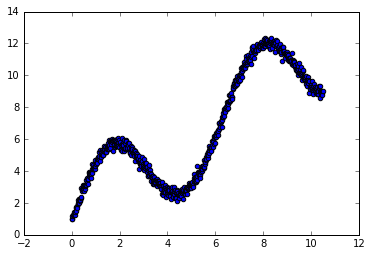

In [20]:
plt.scatter(train_X, train_y)
plt.show()

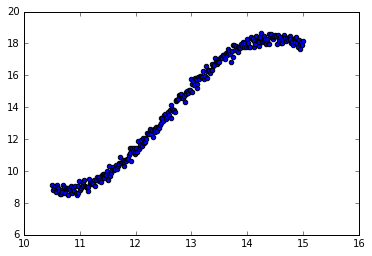

In [21]:
plt.scatter(test_X, test_y)
plt.show()